### imports

In [1]:
from fastai import vision as vis
from pathlib import Path
import os
import numpy as np
import torch

In [2]:
path = Path(os.getcwd()) / '..' / 'data' / 'img'

In [3]:
fnames = vis.get_image_files(path)
fnames[:5]

[PosixPath('/Users/eric/Projects/stonks/ml/notebooks/../data/img/0.01_XLE_2018-05-11T00:00:00.png'),
 PosixPath('/Users/eric/Projects/stonks/ml/notebooks/../data/img/-0.01_XLF_2019-05-10T00:00:00.png'),
 PosixPath('/Users/eric/Projects/stonks/ml/notebooks/../data/img/0.0_DIA_2017-11-16T00:00:00.png'),
 PosixPath('/Users/eric/Projects/stonks/ml/notebooks/../data/img/0.0_SPY_2019-05-31T00:00:00.png'),
 PosixPath('/Users/eric/Projects/stonks/ml/notebooks/../data/img/0.0_XLI_2018-04-09T00:00:00.png')]

In [4]:
np.random.seed(42)
pat = r'([-\d\.]+)[^\.]+\.png'
bs = 20

In [5]:
data = vis.ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=None, size=200, bs=bs, num_workers=0)

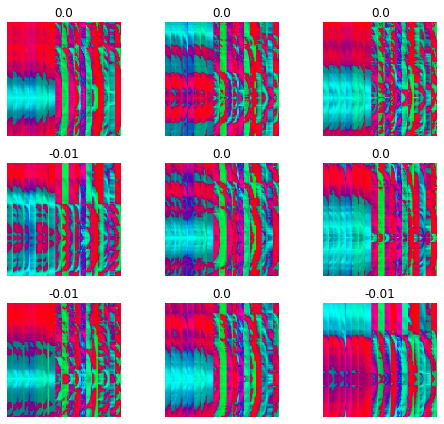

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
print(data.classes)

['-0.01', '-0.05', '-0.1', '0.0', '0.01', '0.05', '0.1']


In [8]:
learn = vis.cnn_learner(data, vis.models.resnet18, metrics=[vis.accuracy, vis.error_rate])

In [9]:
learn.model = torch.nn.DataParallel(learn.model)

In [10]:
learn.model

DataParallel(
  (module): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-0

In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.913620,1.391859,0.536455,0.463545,12:23
1,1.170865,1.097860,0.553177,0.446823,11:46
2,1.083470,1.048812,0.589298,0.410702,11:49
3,0.947151,0.923189,0.614047,0.385953,12:08
4,0.865302,0.891556,0.622074,0.377926,11:46
5,0.744471,0.884454,0.627425,0.372575,11:46


In [12]:
learn.save('fit-one')

In [13]:
interp = vis.ClassificationInterpretation.from_learner(learn)

In [14]:
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

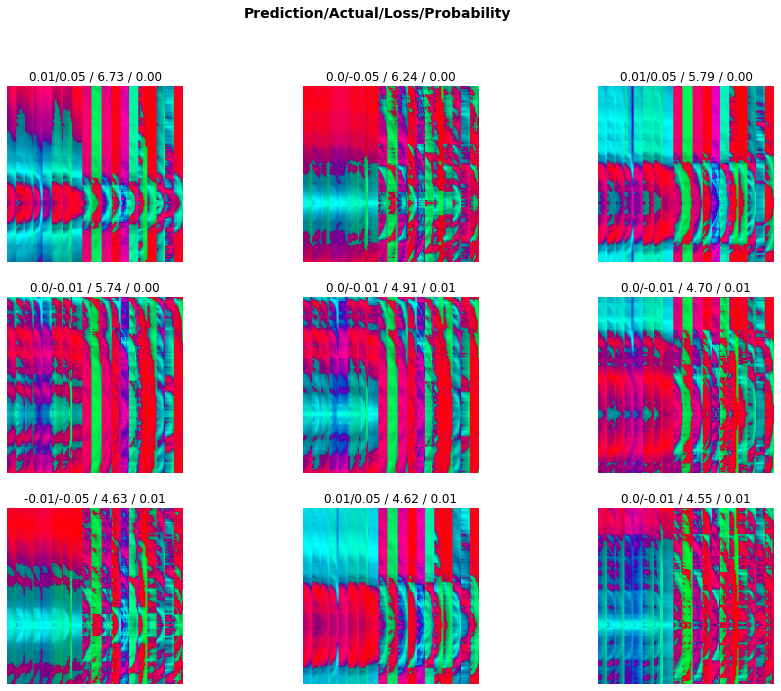

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

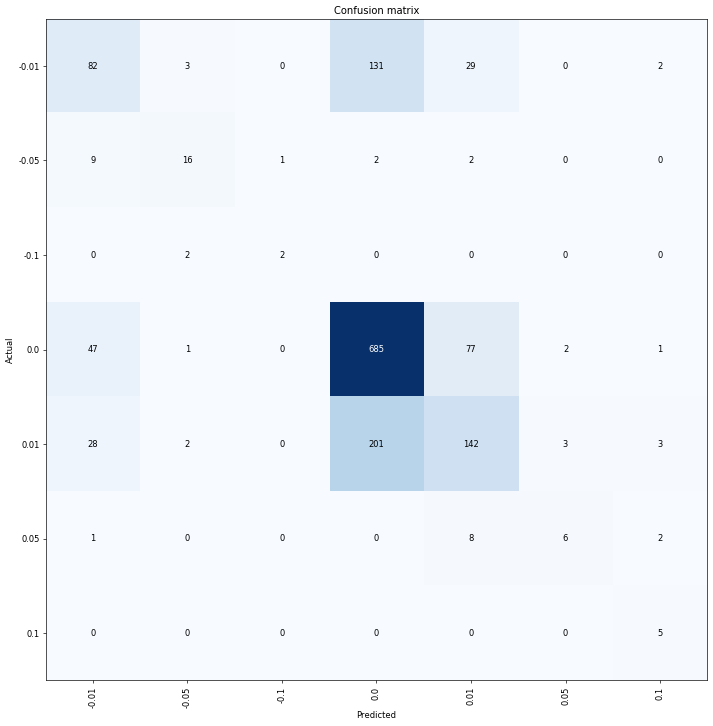

In [16]:

interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


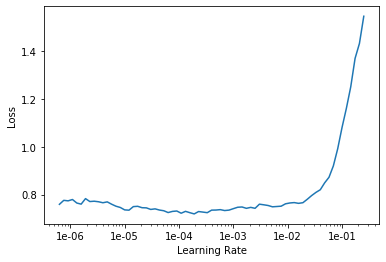

In [18]:
learn.recorder.plot()

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.937014,0.897831,0.614716,0.385284,16:29
1,0.636426,0.789730,0.679599,0.320401,16:30


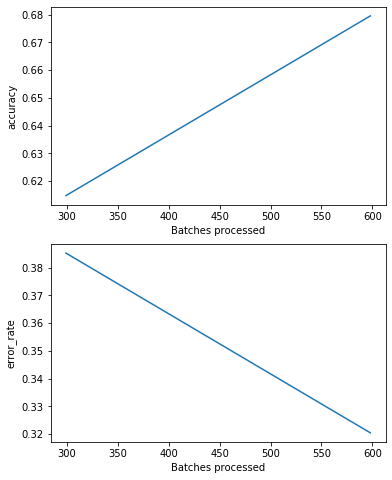

In [20]:
learn.recorder.plot_metrics()

In [21]:
learn.metrics

[<function fastai.metrics.accuracy(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7faf88060050>>,
 <function fastai.metrics.error_rate(input: torch.Tensor, targs: torch.Tensor) -> <function NewType.<locals>.new_type at 0x7faf88060050>>]

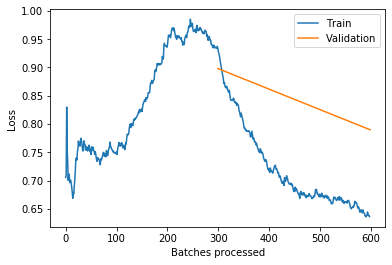

In [22]:
learn.recorder.plot_losses()